# Web-scraping Using Beautifulsoup

Beautiful Soup is a widely used Python library that specializes in web scraping and parsing HTML and XML documents. You can apply Beautifulsoup to build web-crawlers to acquire data from most websites. If you want to know more about Beautifulsoup, please refer to its documentation: https://beautiful-soup-4.readthedocs.io/en/latest/  



## 0. Set up

In [1]:
!pip3 install requests

In [2]:
!pip3 install beautifulsoup4

### Import the modules

In [3]:
import requests
import bs4

## 1. Overview

In today's lab, we are going to use snscrape to scrape data from Wikipedia and Alldeaf forum. You will learn:

1. How to fetch html data from a given URL
2. How to use basic bs4 commands to extract useful information
3. How to create a basic web-scrawler for an online forum which you need to obtain information from

## 2. Making a request and parsing HTML

We start by sending a GET request to the website you want to scrape using the requests library.

In [6]:
URL = "https://en.wikipedia.org/wiki/Duke_Kunshan_University"

response = requests.get(URL)

# Check if the request was successful
if response.status_code == 200:
    html_content = response.content
else:
    print("Failed to retrieve the webpage")

Once we have the HTML content, we can create a BeautifulSoup object to parse it. Here we will use 'html.parser' as our parser.

In [7]:
soup = bs4.BeautifulSoup(html_content, 'html.parser')
soup

<!DOCTYPE html>

<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>Duke Kunshan University - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled";var cookie=document.cookie.match(/(?:^|; )enwikimwclientpref

## 3. Filtering target information

### 3.1 Inspecting a webpage

First, let us recall the *Inspect* window we see from last lab.

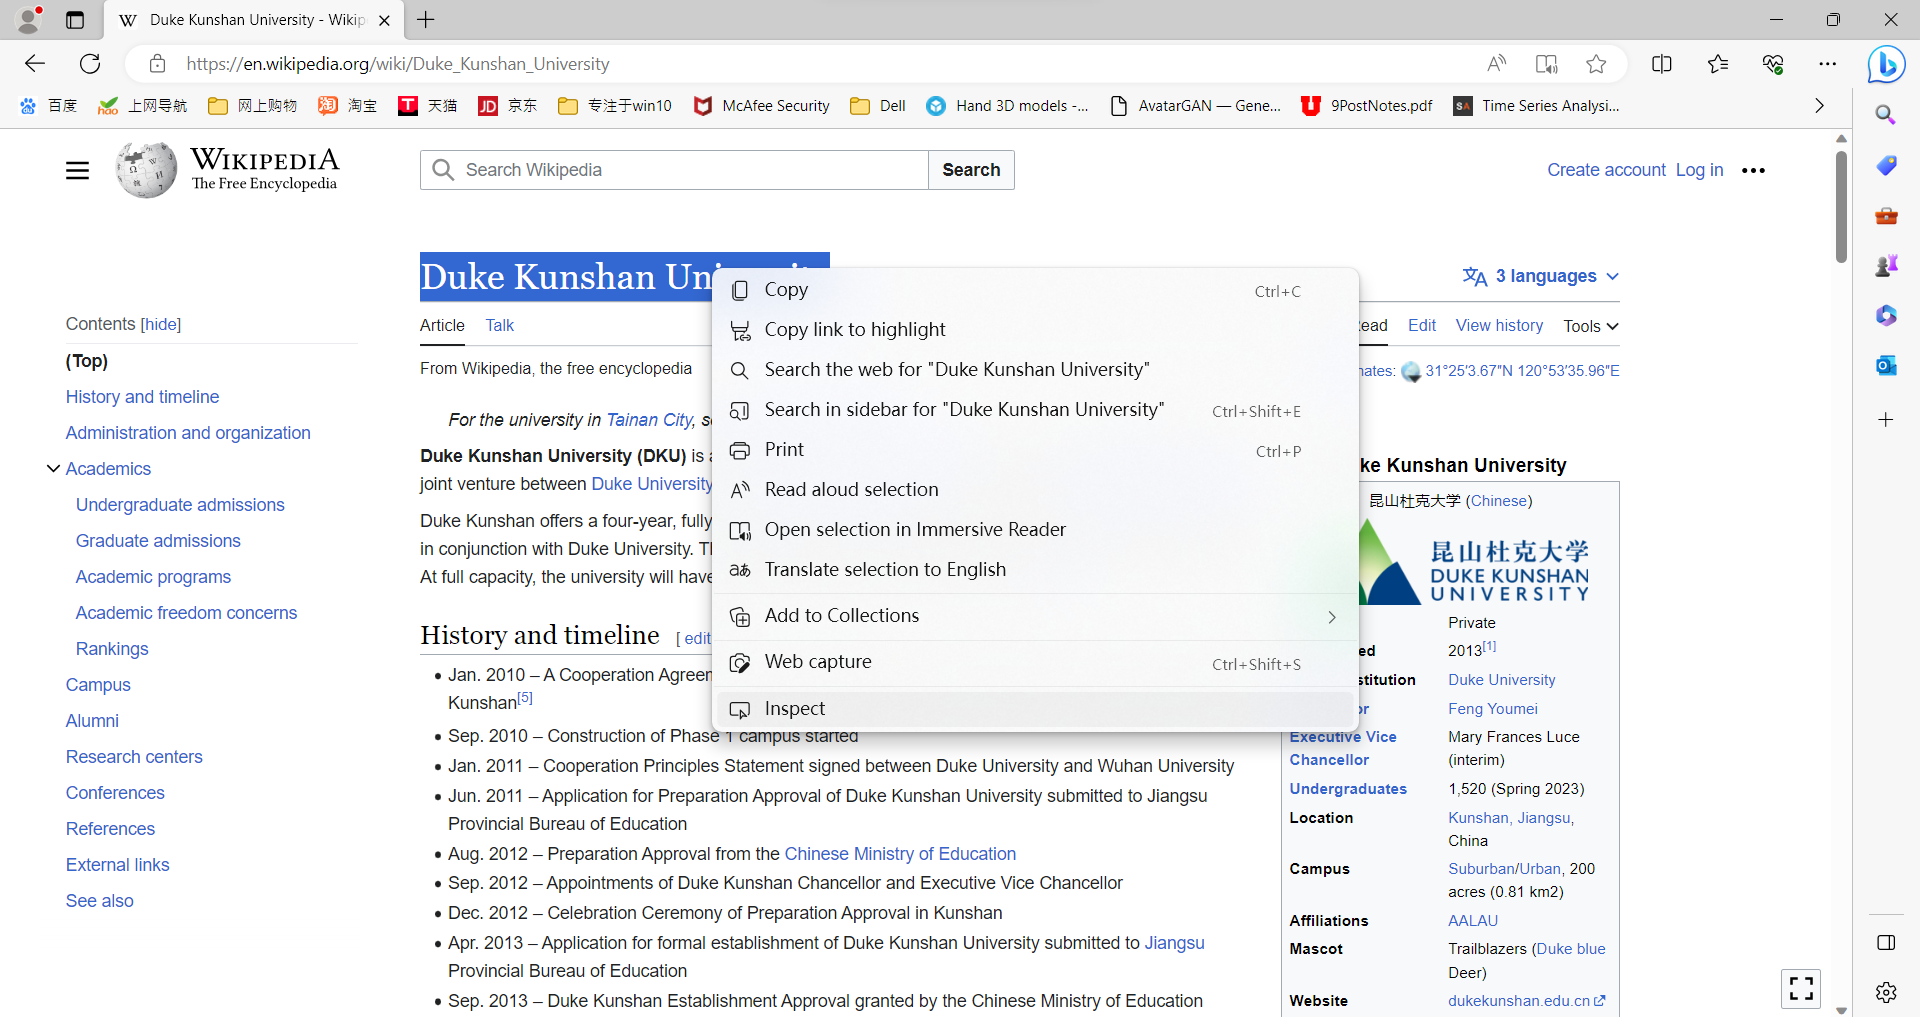

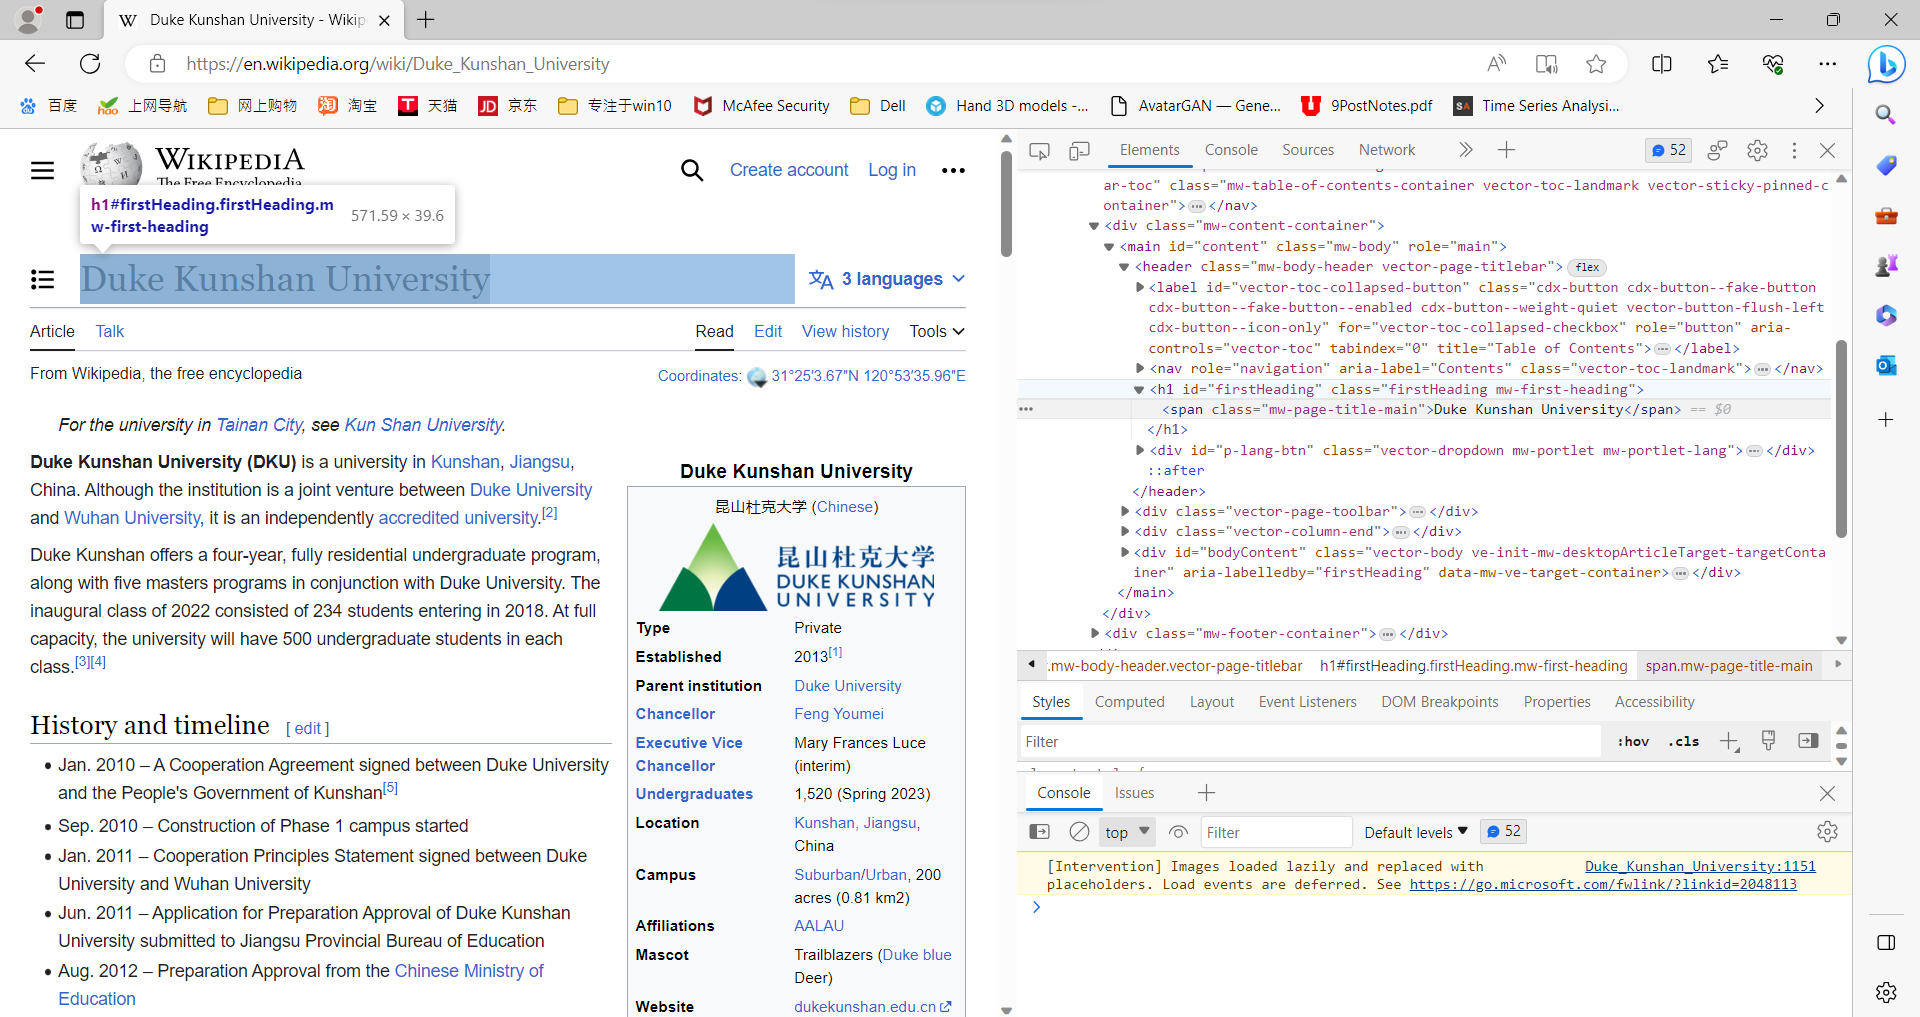

As you can see, when you are selecting a certain item and click inspect, the corresponding html code will automatically be highlighted. You can use this method to rapidly locate where your target information lie in the code. For example, here we want to obtain the title of the page, which is *Duke Kunshan University*, we can see that it is under h1 tag.

### 3.2 Finding elements by tag name

To find the first element with a certain tag name, we can use the find() method.

In [8]:
title = soup.find('h1')  # Finds the first <h1> tag
print(title.text)  # Prints the text content within the tag

Duke Kunshan University


To find all elements with a certain tag name, we can use the find_all() method.

In [9]:
paragraphs = soup.find_all('p')  # Finds all <p> tags
for p in paragraphs:
    print(p.text)

Duke Kunshan University (DKU) is a university in Kunshan, Jiangsu, China. Although the institution is a joint venture between Duke University and Wuhan University, it is an independently accredited university.[2]

Duke Kunshan offers a four-year, fully residential undergraduate program, along with five masters programs in conjunction with Duke University. The inaugural class of 2022 consisted of 234 students entering in 2018. At full capacity, the university will have 500 undergraduate students in each class.[3][4]

Duke Kunshan University is governed by an independent Board of Trustees, with members from Duke University and Wuhan University.[12]

Duke Kunshan University admitted its first undergraduate students as part of the Class of 2022. Significantly exceeding its original target of 1,500 applicants, the university received a total of 3,143 applications for an estimated 225 first-year spots, including 2,551 applications from China and 332 from the United States. There were 80 coun

We can in-fact access the attributes of an element using dictionary-like syntax. For instance, if we want to get the link from tag < a >.

In [10]:
sample = soup.find('a')
print(sample)
print(sample['href'])

<a class="mw-jump-link" href="#bodyContent">Jump to content</a>
#bodyContent


In [11]:
link = []
a_tag = soup.find_all('a')
for element in a_tag:
  try:
     link.append(element['href']) # Prints the value of the 'href' attribute
  except:
    continue

print(link)

['#bodyContent', '/wiki/Main_Page', '/wiki/Wikipedia:Contents', '/wiki/Portal:Current_events', '/wiki/Special:Random', '/wiki/Wikipedia:About', '//en.wikipedia.org/wiki/Wikipedia:Contact_us', 'https://donate.wikimedia.org/wiki/Special:FundraiserRedirector?utm_source=donate&utm_medium=sidebar&utm_campaign=C13_en.wikipedia.org&uselang=en', '/wiki/Help:Contents', '/wiki/Help:Introduction', '/wiki/Wikipedia:Community_portal', '/wiki/Special:RecentChanges', '/wiki/Wikipedia:File_upload_wizard', '/wiki/Main_Page', '/wiki/Special:Search', '/w/index.php?title=Special:CreateAccount&returnto=Duke+Kunshan+University', '/w/index.php?title=Special:UserLogin&returnto=Duke+Kunshan+University', '/w/index.php?title=Special:CreateAccount&returnto=Duke+Kunshan+University', '/w/index.php?title=Special:UserLogin&returnto=Duke+Kunshan+University', '/wiki/Help:Introduction', '/wiki/Special:MyContributions', '/wiki/Special:MyTalk', '#', '#History_and_timeline', '#Administration_and_organization', '#Academics'

There are other useful functions, e.g.

element.parent: Access the parent element.

element.contents: Access the child elements as a list.

element.next_sibling and element.previous_sibling: Access the adjacent elements.

element.next_element and element.previous_element: Access the next and previous elements in the document.

### Exercise 1

Find a Wikipedia webpage that you are interested and print out its page title. Fetch it and convert it into a beautifulsoup object.

In [19]:
URL2= "https://en.wikipedia.org/wiki/Imagine_Dragons"

response2 = requests.get(URL2)

# Check if the request was successful
if response2.status_code == 200:
    html_content2 = response2.content
else:
    print("Failed to retrieve the webpage")


b'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>Imagine Dragons - Wikipedia</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled";var cookie=document.cookie.match(/(?:^|; )enwikimwclientprefere

In [21]:
soup2 = bs4.BeautifulSoup(html_content2, 'html.parser')
soup2
print(soup2.prettify())

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Imagine Dragons - Wikipedia
  </title>
  <script>
   (function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled";var cookie=document.cookie.match(/(?:^|; )enwikimwc

### Exercise 2

Print out the title of your Wikipedia page in Exercise 1.

In [22]:

title2 = soup2.find('h1')  # Finds the first <h1> tag
print(title2.text)  # Prints the text content within the tag

Imagine Dragons


### Exercise 3

Scrape some useful information (e.g. body content or tables) on your own, and briefly explain what and how you scraped these data in two or three sentences.

In [26]:
for img_tag in soup2.find_all("img"):
    # print(img_tag)
    img_url = img_tag.get("src")
    # print(img_url)
    if img_url:
        if not img_url.startswith(('http:', 'https:')):
            img_url = requests.compat.urljoin(URL2, img_url)
        print(img_url)

https://en.wikipedia.org/static/images/icons/wikipedia.png
https://en.wikipedia.org/static/images/mobile/copyright/wikipedia-wordmark-en.svg
https://en.wikipedia.org/static/images/mobile/copyright/wikipedia-tagline-en.svg
https://upload.wikimedia.org/wikipedia/en/thumb/b/b7/Pending-protection-shackle.svg/20px-Pending-protection-shackle.svg.png
https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Imagine_Dragons_at_LoveLoud_2018_%2842462959830%29.jpg/300px-Imagine_Dragons_at_LoveLoud_2018_%2842462959830%29.jpg
https://upload.wikimedia.org/wikipedia/commons/thumb/7/7e/Imagine_Dragons_-_Ilosaarirock_2013_2.jpg/220px-Imagine_Dragons_-_Ilosaarirock_2013_2.jpg
https://upload.wikimedia.org/wikipedia/commons/thumb/d/d2/Imagine_Dragons_July_6_2015_Verizon_Center.jpg/220px-Imagine_Dragons_July_6_2015_Verizon_Center.jpg
https://upload.wikimedia.org/wikipedia/commons/thumb/2/23/Imagine_Dragons_-_Uncasville_CT_-_November_2017_-_1.jpg/220px-Imagine_Dragons_-_Uncasville_CT_-_November_2017_-_1.jp

Brief explanation: To find all the pictures in this website,I first use 'find all' to find all html codes start with img which means there is one picture been refered to in this line of code. Among all these links, i want to find all links start with http: or https: which I can directly visit. Then i print all the pictures i found

### Exercise 4 (optional)

Create a dataset for visualization on your own, you can refer to a sample project by students from previous class: https://github.com/XiangrongDanielZhu/Alldeaf_Forum_Scrape